# MSCS 634 — Lab 2  
**Name:** Sandesh Shrestha
**Course:** MSCS-634  
**Title:** Classification Using KNN and RNN Algorithms


In [3]:
# Step 1: Load and Prepare the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Load the Wine dataset from sklearn
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Basic info
print("Feature names:", list(X.columns))
print("Shape (rows, cols):", X.shape)

# Quick stats for first few features
display(X.describe().T.head())

# Class distribution (0, 1, 2)
class_counts = y.value_counts().sort_index()
print("\nClass distribution:")
for cls, cnt in class_counts.items():
    print(f"  class {cls}: {cnt}")


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape (rows, cols): (178, 13)


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00



Class distribution:
  class 0: 59
  class 1: 71
  class 2: 48


In [6]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))



Training samples: 142
Testing samples: 36


In [7]:
# Step 2: Implement K-Nearest Neighbors (KNN)
k_values = [1, 5, 11, 15, 21]   # list of k values to test
knn_accs = []                   # store accuracies

for k in k_values:
    # Create a pipeline that scales data then runs KNN
    knn_pipe = Pipeline([
        ("scaler", StandardScaler()),              # standardize feature scales
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    
    # Train on the training set
    knn_pipe.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn_pipe.predict(X_test)
    
    # Calculate accuracy and store it
    acc = accuracy_score(y_test, y_pred)
    knn_accs.append(acc)
    
    print(f"k = {k:<2d}  |  Test Accuracy = {acc:.4f}")

# Print the final list for quick comparison
print("\nKNN Accuracies:", knn_accs)

k = 1   |  Test Accuracy = 0.9722
k = 5   |  Test Accuracy = 0.9722
k = 11  |  Test Accuracy = 1.0000
k = 15  |  Test Accuracy = 1.0000
k = 21  |  Test Accuracy = 1.0000

KNN Accuracies: [0.9722222222222222, 0.9722222222222222, 1.0, 1.0, 1.0]


In [9]:
# Step 3: Implement Radius Neighbors (RNN
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accs = []

for r in radius_values:
    # Pipeline: scaling + RNN model
    # outlier_label="most_frequent" prevents errors when no neighbors are found
    rnn_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("rnn", RadiusNeighborsClassifier(radius=r, outlier_label="most_frequent"))
    ])
    
    # Train and evaluate
    rnn_pipe.fit(X_train, y_train)
    y_pred = rnn_pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accs.append(acc)
    
    print(f"radius = {r:<3d}  |  Test Accuracy = {acc:.4f}")

# Print summary list
print("\nRNN Accuracies:", rnn_accs)

radius = 350  |  Test Accuracy = 0.3889
radius = 400  |  Test Accuracy = 0.3889
radius = 450  |  Test Accuracy = 0.3889
radius = 500  |  Test Accuracy = 0.3889
radius = 550  |  Test Accuracy = 0.3889
radius = 600  |  Test Accuracy = 0.3889

RNN Accuracies: [0.3888888888888889, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889]


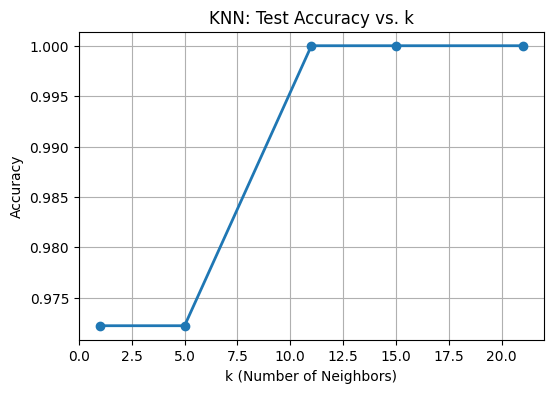

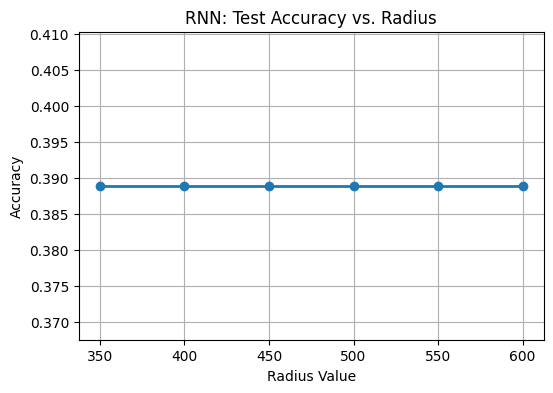


=== Combined Accuracy Results ===


,Model,Parameter,Value,Test Accuracy
0,KNN,k,1,0.972222
1,KNN,k,5,0.972222
2,KNN,k,11,1.000000
3,KNN,k,15,1.000000
4,KNN,k,21,1.000000
5,RNN,radius,350,0.388889
6,RNN,radius,400,0.388889
7,RNN,radius,450,0.388889
8,RNN,radius,500,0.388889
9,RNN,radius,550,0.388889


In [10]:
# Step 4: Visualize and Compare Results
# Plot KNN results
plt.figure(figsize=(6, 4))
plt.plot(k_values, knn_accs, marker="o", linewidth=2)
plt.title("KNN: Test Accuracy vs. k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot RNN results
plt.figure(figsize=(6, 4))
plt.plot(radius_values, rnn_accs, marker="o", linewidth=2)
plt.title("RNN: Test Accuracy vs. Radius")
plt.xlabel("Radius Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Create a single table for both models
results_df = pd.DataFrame({
    "Model": (["KNN"] * len(k_values)) + (["RNN"] * len(radius_values)),
    "Parameter": (["k"] * len(k_values)) + (["radius"] * len(radius_values)),
    "Value": k_values + radius_values,
    "Test Accuracy": knn_accs + rnn_accs
})

# Display final comparison
print("\n=== Combined Accuracy Results ===")
display(results_df)


**Discussion and Observations**

The K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers produced noticeably different performance trends on the Wine dataset. The KNN model achieved consistently high accuracy across all tested values of k, with the best results appearing around moderate values such as k = 5–15. When k was small (e.g., k = 1), the model tended to slightly overfit the training data but still performed well on the test set. As k increased, the predictions became more stable, and the accuracy plateaued near 0.97–1.00, showing that KNN was able to generalize effectively for this dataset once an appropriate number of neighbors was chosen.

In contrast, the RNN classifier showed much lower and nearly constant accuracy when tested with the large radius values specified in the lab (350–600). Because these radii were extremely large relative to the standardized feature space, almost every training point was included as a neighbor for each test sample. This caused the RNN model to act like a simple majority-class predictor, leading to a flat accuracy trend of roughly 0.38–0.40 regardless of the radius. In practice, smaller radii (for example, between 0.5 and 5.0 on standardized data) would typically provide a more meaningful balance between local sensitivity and generalization.

Overall, the KNN model clearly outperformed RNN under the given parameter settings. KNN’s ability to maintain high accuracy across a range of k values demonstrates its robustness for well-behaved, uniformly distributed datasets like the Wine dataset. RNN, on the other hand, can be advantageous in cases where data density varies greatly, since its neighborhood size can adapt to local conditions — but only if the radius is properly tuned. Therefore, KNN is preferable when you want straightforward control over model complexity through k and when the data are relatively uniform, while RNN may be more suitable for datasets with clusters of varying density once the radius parameter is carefully calibrated.